# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

%load_ext nb_black

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

## Loading the dataset

In [2]:
# loading the dataset
data = pd.read_csv("used_device_data.csv")

data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

In [3]:
# creating a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

 ### Observations

In [4]:
df.shape

(3454, 15)

<IPython.core.display.Javascript object>

#### Jonathan's Comments:

The dataset contains 3454 and 15 columns 


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

 #### Jonathan's Comments:
 
 * Categorical Variables: Brand name, os, 4g, 5g
 * Numerical variables: screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, wight, release_year, days_used, normalized_used_price, normalized_new_price
 
There are missing values that should be treated on the next steps 
 
 
 

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

 #### Jonathan's Comments:
    
    * The most popular OS is Android
    * There are 34 different brands on the dataset
    * There are more devices with 5g (3302) technology than 4g (2335)
    

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

 ### functions for EDA

In [7]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [8]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [9]:
def numVsCatPlot(data, numFeature, catFeature, figsize=(12, 7), **kwargs):

    """
    Boxplot and pointplot combined for numerical vs categorical visualization

    data: dataframe
    numFeature: numerical feature column name
    catFeature: categorical feature column name
    figsize: size of figure (default (12,7))
    **kwargs: additional optional arguments
    """
    ## Mean per categrical variable ordered by the value of the mean
    meanAgg = data.groupby(catFeature)[numFeature].mean().sort_values(ascending=False)

    # Customizing figure size and x-ticks rientation
    plt.figure(figsize=figsize)
    plt.xticks(rotation=60)

    # pointplot
    sns.pointplot(
        x=catFeature,
        y=numFeature,
        data=data,
        order=meanAgg.index,
        color="yellow",
        **kwargs
    )

    # Boxplot
    sns.boxplot(
        x=catFeature,
        y=numFeature,
        data=data,
        order=meanAgg.index,
        palette="crest",
        **kwargs
    )

<IPython.core.display.Javascript object>

Weight vs Brand Name

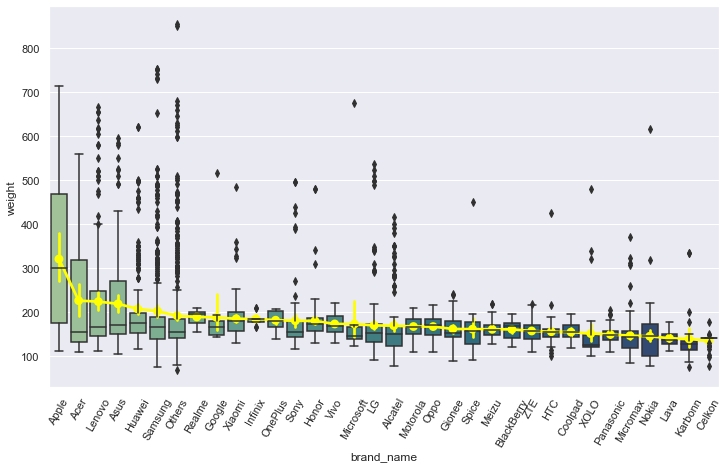

<IPython.core.display.Javascript object>

In [10]:
numVsCatPlot(df, "weight", "brand_name")

The brand apple have the higher weight mean 

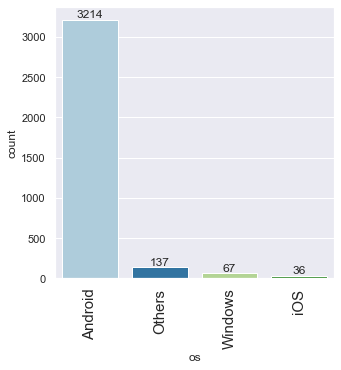

<IPython.core.display.Javascript object>

In [11]:
labeled_barplot(df, "os")

Most popular OS is Android with 3214 phones in the datase

In [12]:
numerical_vars = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
    "days_used",
    "normalized_used_price",
    "normalized_new_price",
]

<IPython.core.display.Javascript object>

<AxesSubplot:>

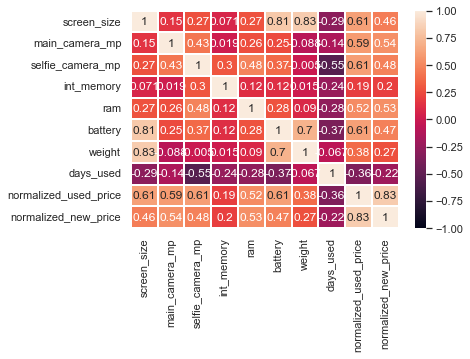

<IPython.core.display.Javascript object>

In [13]:
sns.heatmap(df[numerical_vars].corr(), annot=True, vmin=-1, vmax=1, linewidths=0.05)

* There are a strong correlation between weight and screen_size
* Also we can see a strong correlation between battery and screen_size

### Univariate Analysis

#### `normalized_used_price`

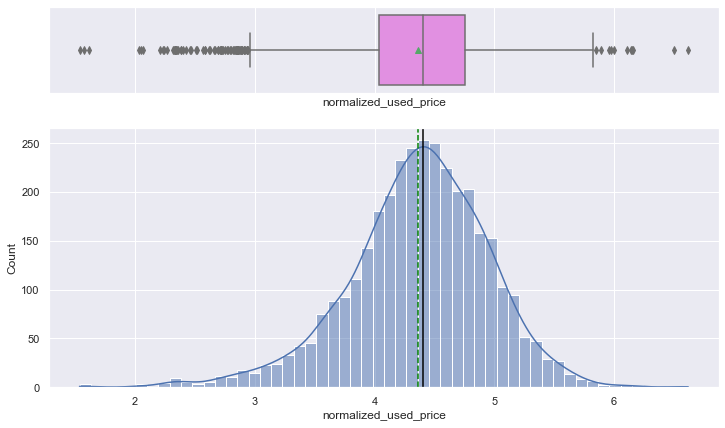

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "normalized_used_price", kde=True)

#### `screen_size`

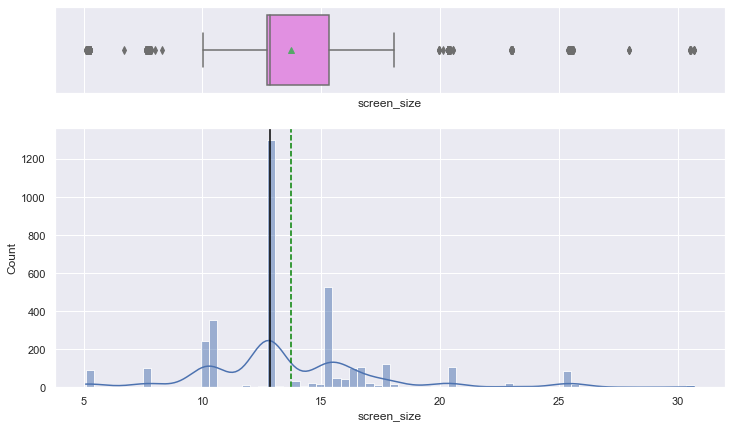

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "screen_size", kde=True)

 * We have a Three modal distribution
 * The boxplot show outliers

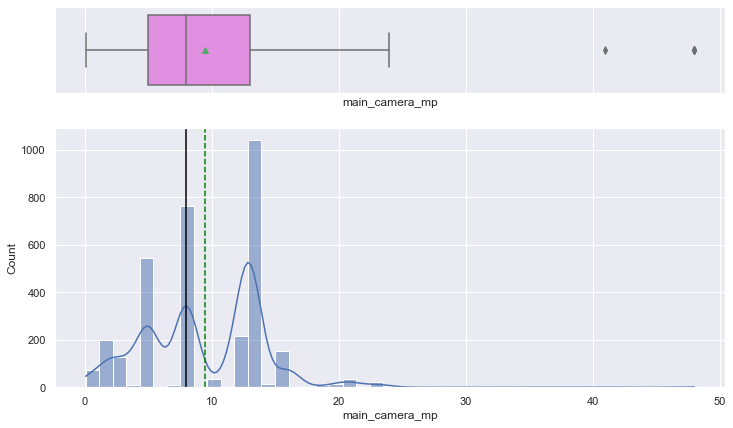

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "main_camera_mp", kde=True)

#### `main_camera_mp`

 * We have a Three modal distribution
 * The boxplot show a very low quantity of outliers

#### `selfie_camera_mp`

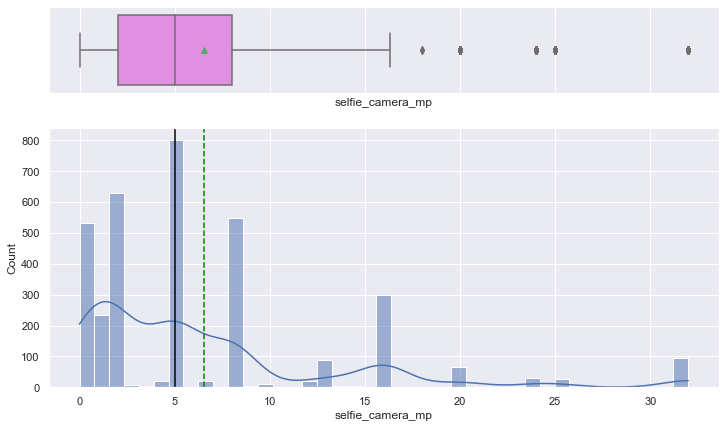

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "selfie_camera_mp", kde=True)

#### `int_memory`

 * There is not possible identify a type of distribution
 * The boxplot show a very low quantity of outliers

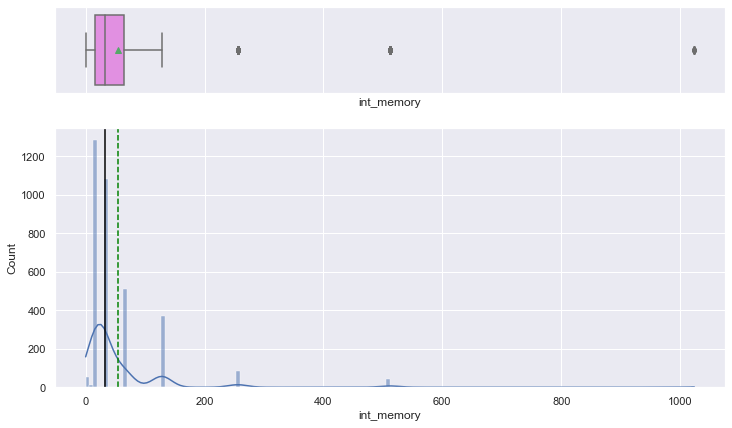

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "int_memory", kde=True)

 * Left skeewed distribution
 * The boxplot show a very low quantity of outliers

#### `ram`

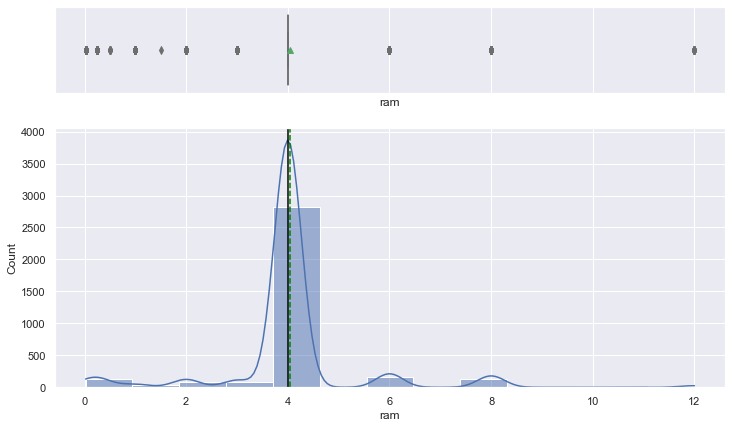

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "ram", kde=True)

 * The distribution have a bell shape 
 * The boxplot show outliers

### Bivariate analysis

#### Correlation Check

In [20]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# dropping start and finish year from list of numerical columns as they are not numerical in nature
num_cols.remove("release_year")

<IPython.core.display.Javascript object>

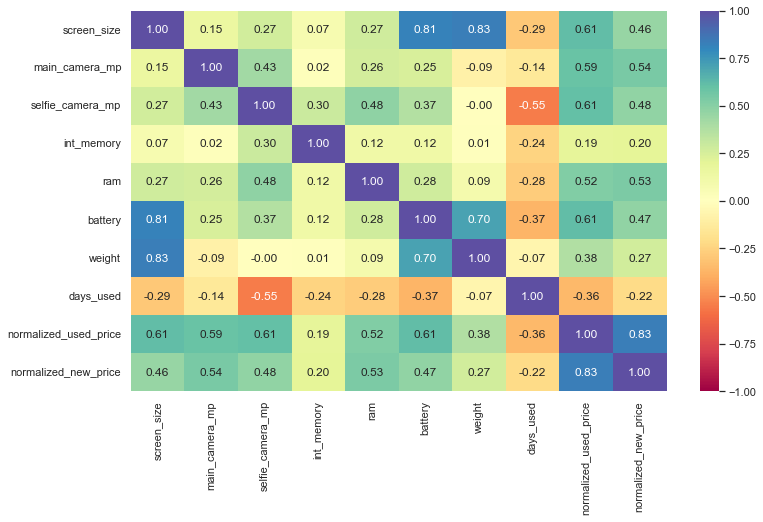

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The screen size is highly correlated with battery
* The screen size is highly correlated with the weight

#### `brand_name` vs `normalized_used_price`

In [22]:
df.groupby("brand_name")["normalized_used_price"].mean().sort_values(ascending=False)

brand_name
OnePlus       5.152165
Apple         5.004553
Google        4.885651
Vivo          4.778147
Oppo          4.755252
Xiaomi        4.710581
Honor         4.665257
Huawei        4.654566
Meizu         4.622101
Realme        4.594316
Sony          4.537851
Asus          4.510720
Samsung       4.466590
Motorola      4.426133
HTC           4.414975
Coolpad       4.399726
Infinix       4.391207
Lenovo        4.379596
ZTE           4.368095
Gionee        4.330395
BlackBerry    4.314155
LG            4.296958
Panasonic     4.218675
Acer          4.217408
Microsoft     4.205679
Others        4.173466
Alcatel       3.970264
XOLO          3.931499
Nokia         3.911802
Lava          3.854529
Karbonn       3.774956
Micromax      3.761856
Spice         3.694512
Celkon        3.230888
Name: normalized_used_price, dtype: float64

<IPython.core.display.Javascript object>

* The most expensive Brand on the data set is OnePlus

#### `normalized_used_price` vs `4g`

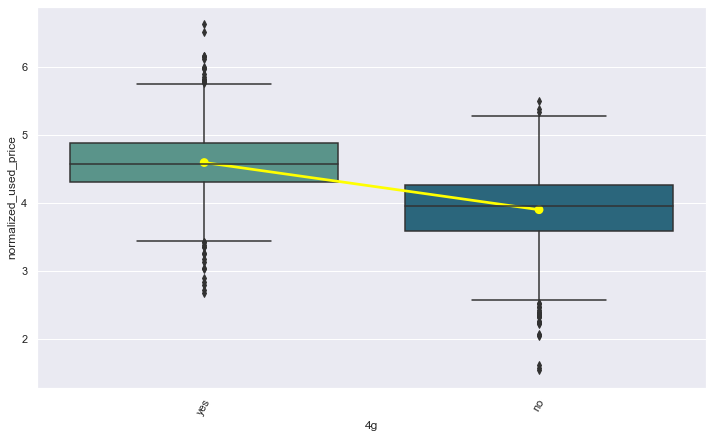

<IPython.core.display.Javascript object>

In [23]:
numVsCatPlot(df, "normalized_used_price", "4g")

* 4g phones enabled are more expensive of those not (as expected)

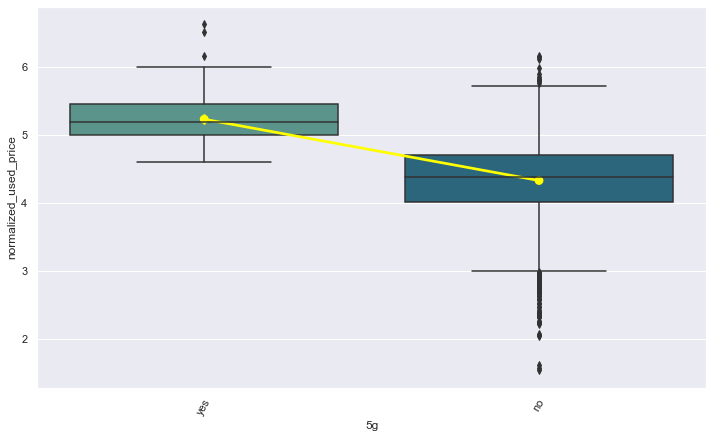

<IPython.core.display.Javascript object>

In [24]:
numVsCatPlot(df, "normalized_used_price", "5g")

* 5g phones enabled are more expensive of those not (as expected)

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Answers:

## 1. What does the distribution of normalized used device prices look like?

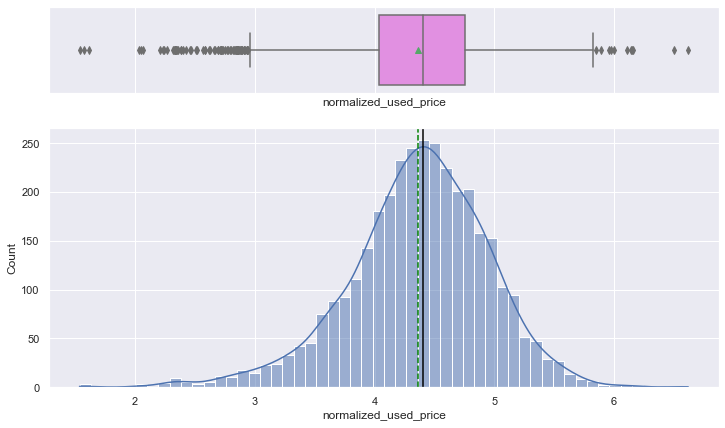

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df, "normalized_used_price", kde=True)

  #### Jonathan's Comments:
  
 * We have a normal distribution
 * The boxplot show outliers
 * Median (4.3) and mean (4.4) are close each other
 
 

### 2. What percentage of the used device market is dominated by Android devices?

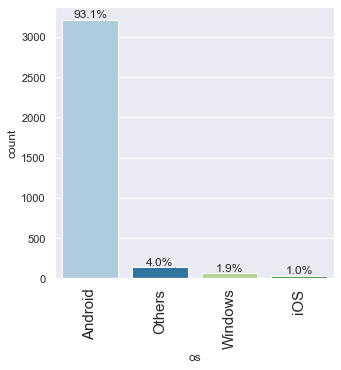

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(df, "os", perc=True)

#### Jonathan's Comments:

The percentage of Android OS on used device market is around 93 %

### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

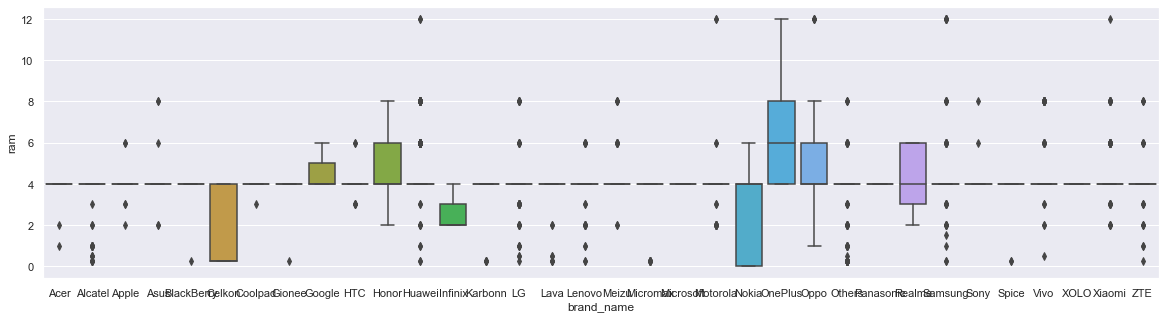

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df.sort_values("brand_name", ascending=True), x="brand_name", y="ram")
# plt.xticks(rotation=90)
plt.show()

#### Jonathan's Comments:

* The variance is not big
* The most popular value from boxplot for minimum, first quartile, median, third quartile and maximum is 4gb
* The are outliers indicating a very high or low RAM, also could be an error on data
* The brand with highest value is One plus with 12 gb



### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [28]:
# getting the phones with battery with more than 4500 mAh

df_bat_gt_4500 = df[df["battery"] > 4500]
df_bat_gt_4500.shape

(341, 15)

<IPython.core.display.Javascript object>

The are 341 phones with large batteries (more than 4500 mAh) 

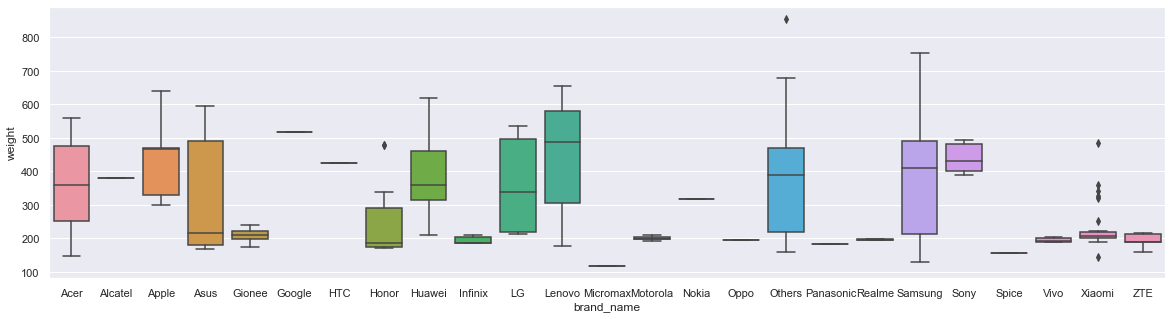

<IPython.core.display.Javascript object>

In [29]:
plt.figure(figsize=(20, 5))
sns.boxplot(
    data=df_bat_gt_4500.sort_values("brand_name", ascending=True),
    x="brand_name",
    y="weight",
)
# plt.xticks(rotation=90)
plt.show()

 #### Jonathan's Comments:
 
 * We could see a big weight variance for those phones with large batteries
 * There are not uniformity on the median for this new dataset
 * Very few Outliers 

### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [30]:
# getting the phones with large screen (more than 6 inches)

df_sc_gt_6_in = df[df["screen_size"] > 6]
df_sc_gt_6_in.shape

(3362, 15)

<IPython.core.display.Javascript object>

In [31]:
df_sc_gt_6_in.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

The are 3362 phones and tablets with more than 6 inches screens

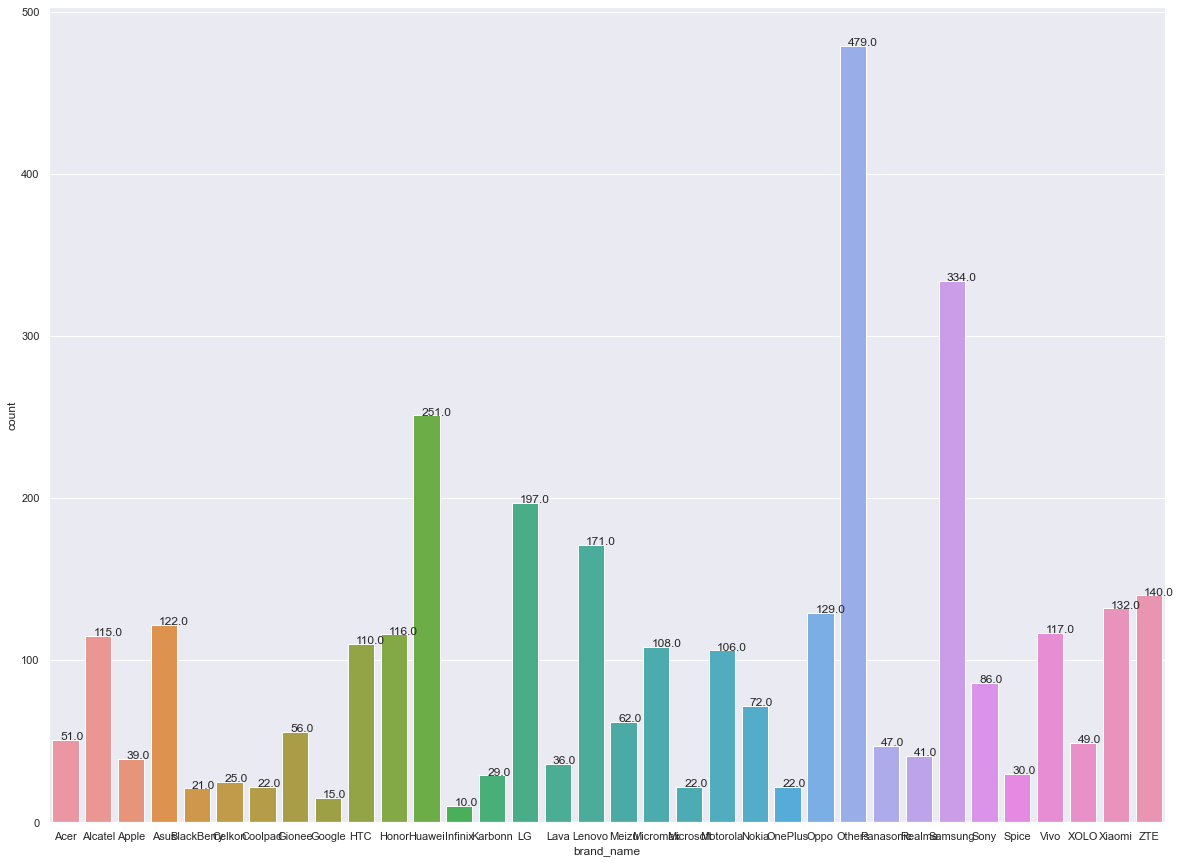

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(20, 15))
ax = sns.countplot(
    data=df_sc_gt_6_in.sort_values("brand_name", ascending=True), x="brand_name"
)
for p in ax.patches:
    ax.annotate(
        "{:.1f}".format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01)
    )
plt.show()

 #### Jonathan's Comments:
 
 * The top five for devices with larger screens below:
 
     * Others 479
     * Samsung 334
     * Huawei 251
     * LG: 197
     * Lenovo: 171

### 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [33]:
df_cam_gt_8_mp = df[df["selfie_camera_mp"] > 8]
df_cam_gt_8_mp.shape

(655, 15)

<IPython.core.display.Javascript object>

The are 665 phones and tablets with selfie camera bigger than 8 MP

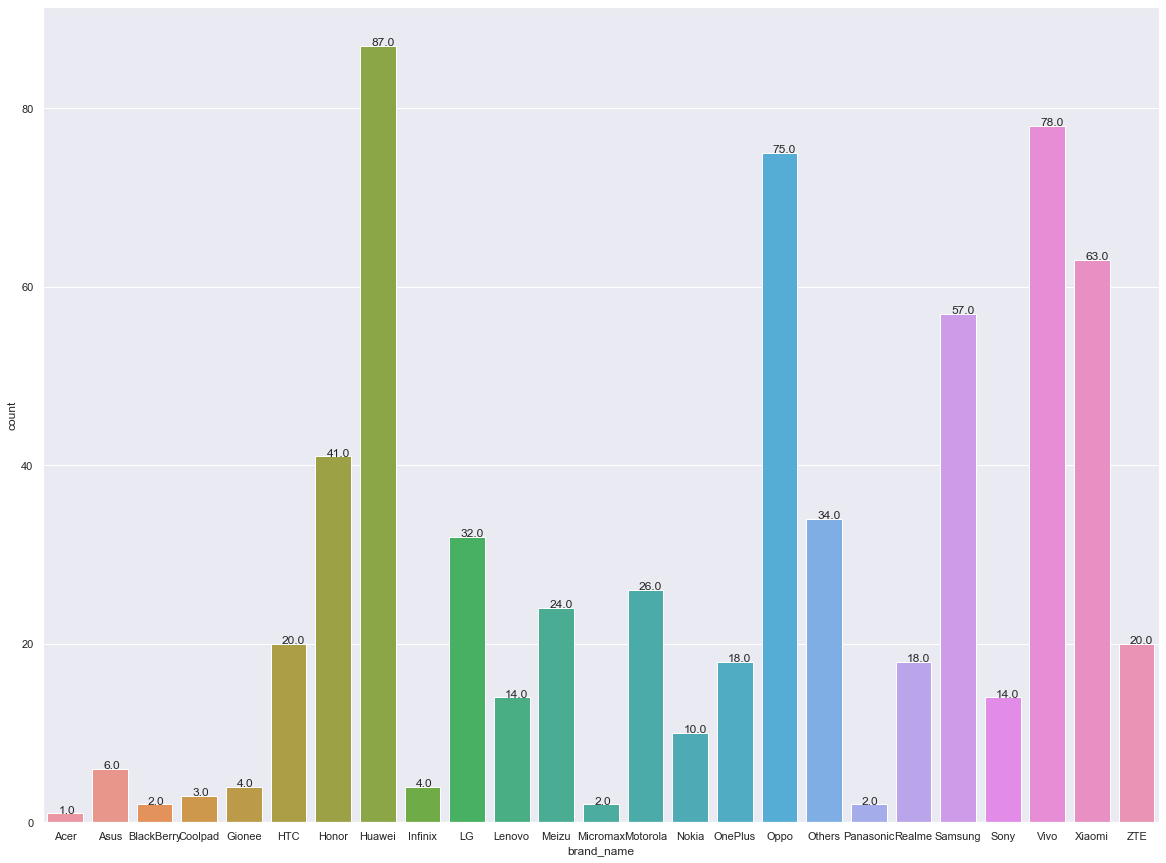

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(20, 15))
ax = sns.countplot(
    data=df_cam_gt_8_mp.sort_values("brand_name", ascending=True), x="brand_name"
)
for p in ax.patches:
    ax.annotate(
        "{:.1f}".format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01)
    )
plt.show()

 #### Jonathan's Comments:
 
 * The top five for devices with 8 MP selfie cameras:
 
     * Huawei 87
     * Vivo 78
     * Oppo 75
     * Xioami: 63
     * Samsung: 57

### 7. Which attributes are highly correlated with the normalized price of a used device?

<AxesSubplot:>

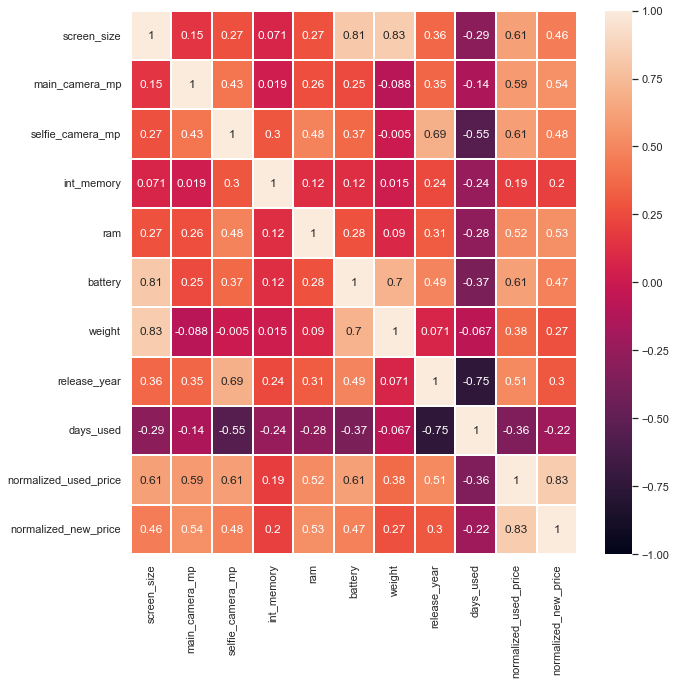

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, linewidths=0.05)

 #### Jonathan's Comments:
 
Below the correlation between normalized price and other attributes:
 
* 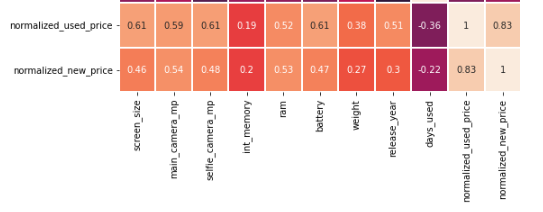

Accordingly with the image we can say that almost all attributes are highly correlated except for days_used, weight and int_memory attributes

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

 ### Missing value treatment

In [36]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [37]:
print("Missing values expressed on %\n", df.isnull().sum() * 100 / len(df))

Missing values expressed on %
 brand_name               0.000000
os                       0.000000
screen_size              0.000000
4g                       0.000000
5g                       0.000000
main_camera_mp           5.182397
selfie_camera_mp         0.057904
int_memory               0.115808
ram                      0.115808
battery                  0.173712
weight                   0.202664
release_year             0.000000
days_used                0.000000
normalized_used_price    0.000000
normalized_new_price     0.000000
dtype: float64


<IPython.core.display.Javascript object>

* The percentage of missing value is actually low
* The dependant variable normalized_used_price doesn't have missing value
* Since the % of missing values is really low 5% or less I've decided to drop the rows with NaN values

In [38]:
# Creating new copy of dataset:
df_new2 = df.copy()

<IPython.core.display.Javascript object>

In [39]:
df_new2.drop("ram", axis=1, inplace=True)
df_new2.drop("release_year", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [40]:
df_new2.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)

<IPython.core.display.Javascript object>

In [41]:
df_new2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
battery                  0
weight                   0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

### Outlier detection and treatment 

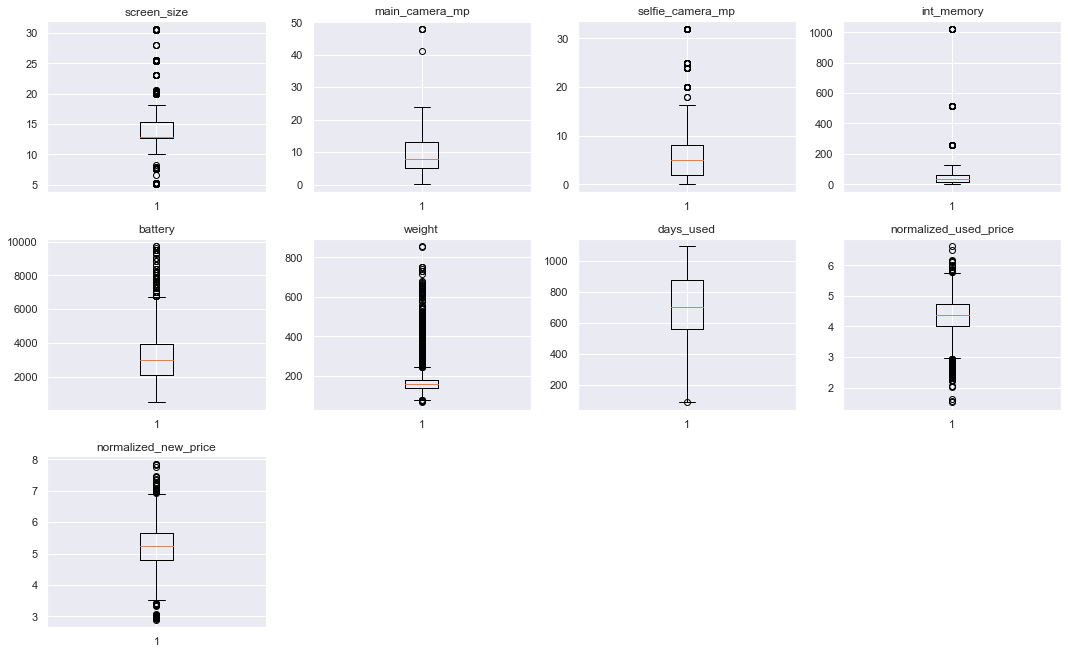

<IPython.core.display.Javascript object>

In [42]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "battery",
    "weight",
    "days_used",
    "normalized_used_price",
    "normalized_new_price",
]
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df_new2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

 We can see outliers in all numerical attributes
 

In [43]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df_new2[numeric_columns].quantile(0.25)
Q3 = df_new2[numeric_columns].quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5 * IQR

<IPython.core.display.Javascript object>

In [44]:
# Percentage of outliers in each column
(
    (df_new2[numeric_columns] < lower_whisker)
    | (df_new2[numeric_columns] > upper_whisker)
).sum() / data.shape[0] * 100

screen_size              12.825709
main_camera_mp            0.144760
selfie_camera_mp          5.211349
int_memory                3.503185
battery                   2.403011
weight                   10.770122
days_used                 0.028952
normalized_used_price     2.374059
normalized_new_price      1.823972
dtype: float64

<IPython.core.display.Javascript object>

### Treating outliers

We will cap/clip the minimum and maximum value of these columns to the lower and upper whisker value of the boxplot found using Q1 - 1.5*IQR and Q3 + 1.5*IQR, respectively.

Note: Generally, a value of 1.5 * IQR is taken to cap the values of outliers to upper and lower whiskers but any number (example 0.5, 2, 3, etc) other than 1.5 can be chosen. The value depends upon the business problem statement.

Creating a function to floor and cap/clip outliers in a column

In [45]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

<IPython.core.display.Javascript object>

**Treating outliers in all numerical columns**

In [46]:
df_new2 = treat_outliers(df_new2, "screen_size")
df_new2 = treat_outliers(df_new2, "main_camera_mp")
df_new2 = treat_outliers(df_new2, "selfie_camera_mp")
df_new2 = treat_outliers(df_new2, "int_memory")
df_new2 = treat_outliers(df_new2, "battery")
df_new2 = treat_outliers(df_new2, "days_used")
df_new2 = treat_outliers(df_new2, "weight")
df_new2 = treat_outliers(df_new2, "normalized_used_price")
df_new2 = treat_outliers(df_new2, "normalized_new_price")

<IPython.core.display.Javascript object>

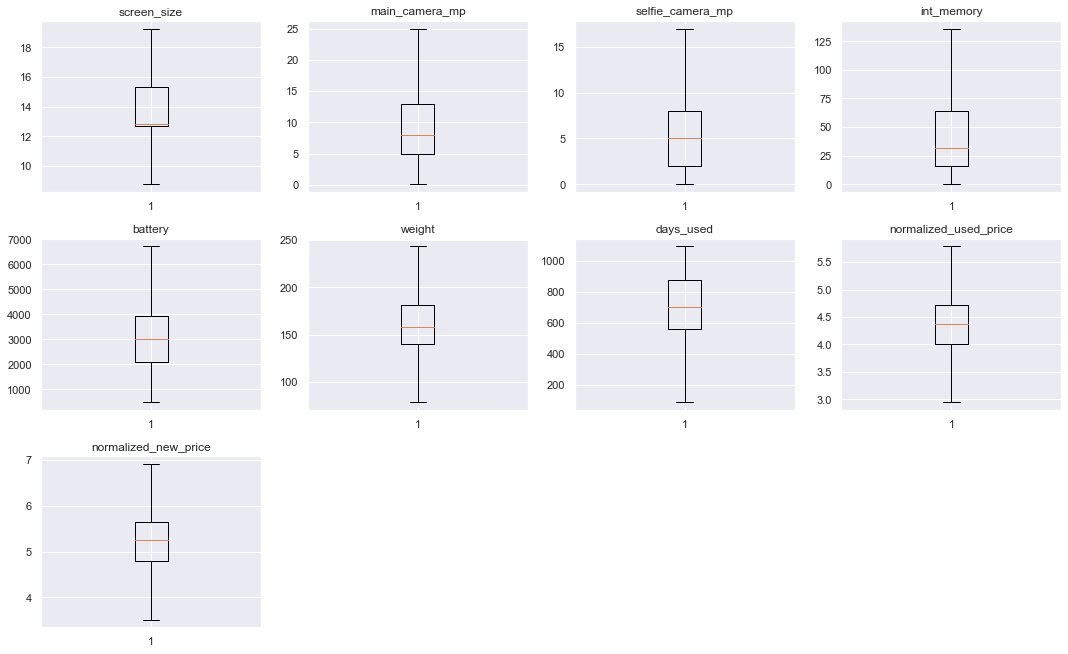

<IPython.core.display.Javascript object>

In [47]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "battery",
    "weight",
    "days_used",
    "normalized_used_price",
    "normalized_new_price",
]
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df_new2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### All outliers have been treated

## EDA

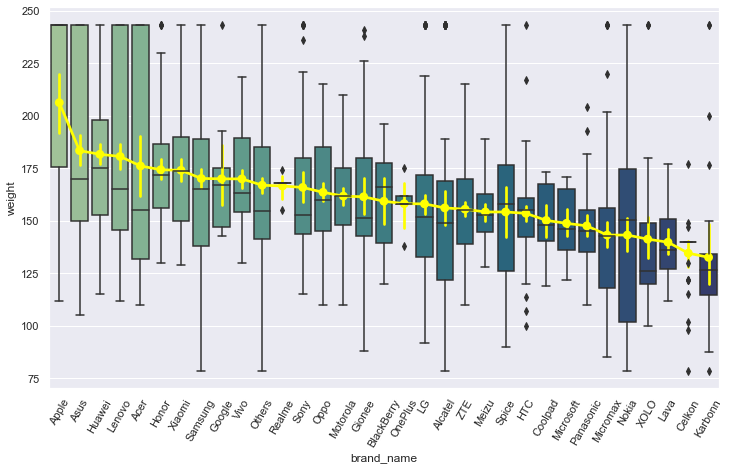

<IPython.core.display.Javascript object>

In [48]:
numVsCatPlot(df_new2, "weight", "brand_name")

### Same plot before of missing values and outliers treatment

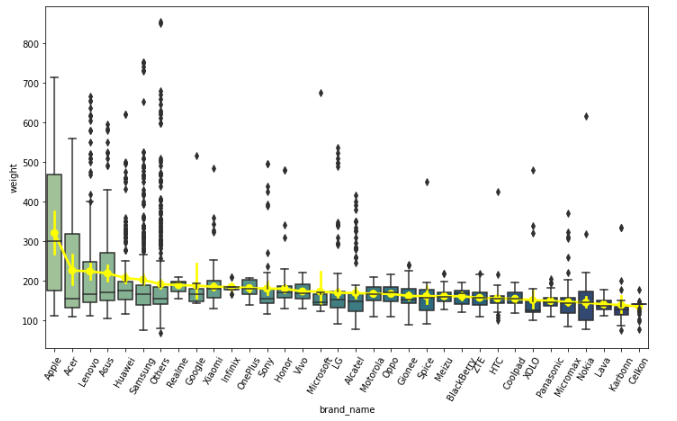

After of perform the Missing values and outliers treatment we can see that Apple keep in the first place as the brand with phones with more weightm, but the others brand in the top 10 are changed their position for example Acer up from 5th place to 2nd 

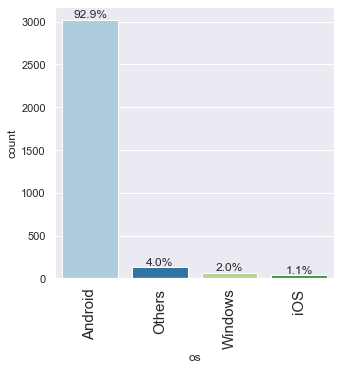

<IPython.core.display.Javascript object>

In [49]:
labeled_barplot(df_new2, "os", perc=True)

In this case the changes are not notorious

<AxesSubplot:>

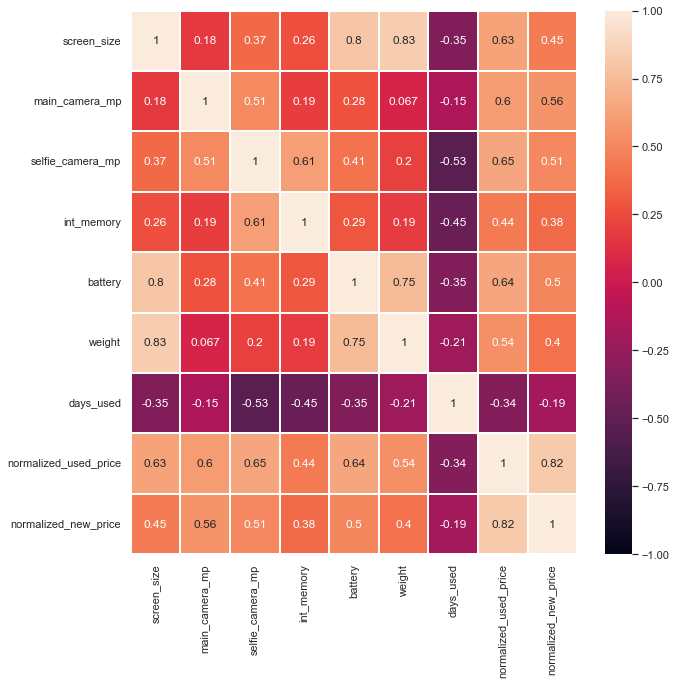

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_new2.corr(), annot=True, vmin=-1, vmax=1, linewidths=0.05)

* Heatmap before of perform missing values and outliers treatment:

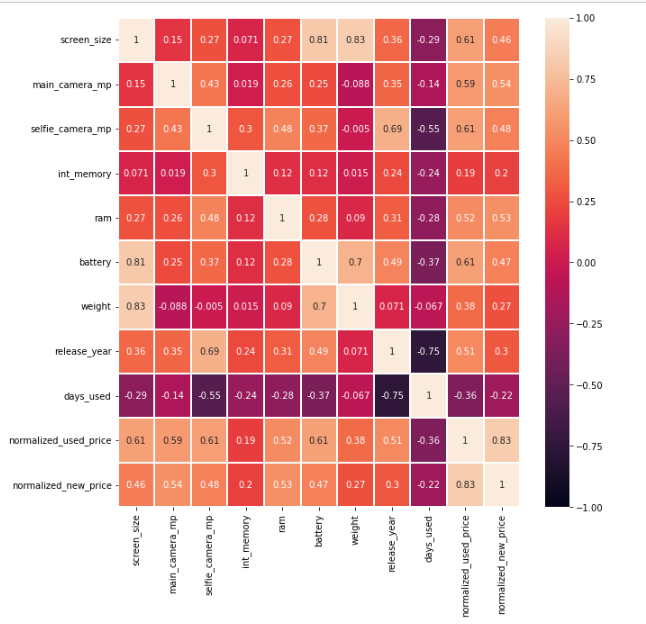

* The most notice change is the about the ram attribute
* Also some correlations getting less stronger

## Model Building - Linear Regression

### Data Preparation for Modeling

In [51]:
X = df_new2.drop(["normalized_used_price"], axis=1)
y = df_new2["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        19.25  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  battery    weight  days_used  \
0               5.0        64.0   3020.0  146.0000      127.0   
1              16.0       128.0   4300.0  213.0000      325.0   
2               8.0       128.0   4200.0  213.0000      162.0   
3               8.0        64.0   6725.0  243.3875      345.0   
4               8.0        64.0   5000.0  185.0000      293.0   

   normalized_new_price  
0              4.715100  
1              5.519018  
2              5.884631  
3              5.630961  
4              4.947837  
0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.38999

<IPython.core.display.Javascript object>

In [52]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [53]:
# Dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.to_list(),
    drop_first=True,
)

print(X.shape)
X.head()

(3256, 46)


,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_new_price,brand_name_Alcatel,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3020.0,146.0000,127.0,4.715100,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,4300.0,213.0000,325.0,5.519018,0,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,4200.0,213.0000,162.0,5.884631,0,...,0,0,0,0,0,0,0,0,1,1
3,1.0,19.25,13.0,8.0,64.0,6725.0,243.3875,345.0,5.630961,0,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,5000.0,185.0000,293.0,4.947837,0,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

**We will now split X and y into train and test sets in a 70:30 ratio.**

In [54]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [55]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2279
Number of rows in test data = 977


<IPython.core.display.Javascript object>

## Fit Linear Model

In [56]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                     257.6
Date:                   Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                           18:47:17   Log-Likelihood:                 183.82
No. Observations:                   2279   AIC:                            -275.6
Df Residuals:                       2233   BIC:                            -12.00
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

### Interpretation of R-squared

* The R-squared value tells us that our model can explain 83.8% of the variance in the training set.

## Model Performance Check

In [57]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [58]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.224412,0.176857,0.832786,0.824515,4.176986


<IPython.core.display.Javascript object>

In [59]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.22322,0.177652,0.838481,0.835153,4.179536


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 0.83, so the model is not underfitting

- The train and test RMSE (0.224412 vs 0.22322 ) and MAE ( 0.176857 vs 0.177652 ) are comparable, so the model is not overfitting either

- MAE suggests that the model can predict the price of a used phone within a mean error of 0.17 on the test data

- MAPE of 4.17 on the test data means that we are able to predict within 4.17% of price of a used phone

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

TEST FOR MULTICOLLINEARITY
Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

Variance Inflation Factor (VIF): Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient 𝛽𝑘 is "inflated" by the existence of correlation among the predictor variables in the model.

If VIF is 1, then there is no correlation among the 𝑘th predictor and the remaining predictor variables, and hence, the variance of 𝛽𝑘 is not inflated at all.
General Rule of thumb:

If VIF is between 1 and 5, then there is low multicollinearity.
If VIF is between 5 and 10, we say there is moderate multicollinearity.
If VIF is exceeding 10, it shows signs of high multicollinearity.
Let's define a function to check VIF.

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [61]:
checking_vif(x_train)

,feature,VIF
0,const,212.903355
1,screen_size,4.844152
2,main_camera_mp,2.434499
3,selfie_camera_mp,3.221376
4,int_memory,2.168766
5,battery,3.536956
6,weight,3.988824
7,days_used,1.777181
8,normalized_new_price,2.669244
9,brand_name_Alcatel,3.189432


<IPython.core.display.Javascript object>

  * some predictor as: brand_name_Apple,brand_name_Huawei,brand_name_Others,brand_name_Samsung,os_iOS have a VIF > 5
  * Lets check how affect the model after drop them

In [62]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [63]:
col_list = [
    "brand_name_Apple",
    "brand_name_Huawei",
    "brand_name_Others",
    "brand_name_Samsung",
    "os_iOS",
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.835300,0.225457
1,brand_name_Others,0.835294,0.225461
2,brand_name_Samsung,0.835269,0.225478
3,os_iOS,0.835180,0.225539
4,brand_name_Apple,0.834952,0.225695


<IPython.core.display.Javascript object>

* The R-squared and RMSE are not affected so we can drop the predictors

In [64]:
col_to_drop = "brand_name_Apple"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,212.174021
1,screen_size,4.843964
2,main_camera_mp,2.432323
3,selfie_camera_mp,3.198189
4,int_memory,2.167472
5,battery,3.522831
6,weight,3.988697
7,days_used,1.766951
8,normalized_new_price,2.645845
9,brand_name_Alcatel,3.026878


<IPython.core.display.Javascript object>

* Multicollinearity is still present for brand_name_Huawei, the predictor will be drop it and check again

In [65]:
col_to_drop = "brand_name_Huawei"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,157.870068
1,screen_size,4.838645
2,main_camera_mp,2.429678
3,selfie_camera_mp,3.190106
4,int_memory,2.161634
5,battery,3.519868
6,weight,3.988468
7,days_used,1.765817
8,normalized_new_price,2.641584
9,brand_name_Alcatel,1.421226


<IPython.core.display.Javascript object>

* We have dealt with Multicollinearity
* Let's rebuild the model using the updated set of predictors variables

In [66]:
olsmodel1 = sm.OLS(y_train, x_train3).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                     269.1
Date:                   Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                           18:47:18   Log-Likelihood:                 181.21
No. Observations:                   2279   AIC:                            -274.4
Df Residuals:                       2235   BIC:                            -22.24
Df Model:                             43                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [67]:
# initial list of columns
predictors = x_train3.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'weight', 'normalized_new_price', 'brand_name_Celkon', 'brand_name_Sony', 'brand_name_Xiaomi', '4g_yes']


<IPython.core.display.Javascript object>

In [68]:
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

<IPython.core.display.Javascript object>

In [69]:
olsmodel2 = sm.OLS(y_train, x_train4).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.836
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                     1153.
Date:                   Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                           18:47:18   Log-Likelihood:                 163.76
No. Observations:                   2279   AIC:                            -305.5
Df Residuals:                       2268   BIC:                            -242.5
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [70]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmodel2, x_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.225193,0.179451,0.835612,0.834815,4.220008


<IPython.core.display.Javascript object>

In [71]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmodel2, x_test4, y_test)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.221985,0.174632,0.836383,0.834518,4.122467


<IPython.core.display.Javascript object>

**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train4* as the final set of predictor variables and *olsmodel2* as the final model to move forward with
* Now adjusted R-squared is 0.834, i.e., our model is able to explain ~83% of the variance
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting
* the variables we dropped were not affecting the model

TEST FOR LINEARITY AND INDEPENDENCE
Why the test?

Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.
How to check linearity and independence?

Make a plot of fitted values vs residuals.
If they don't follow any pattern, then we say the model is linear and residuals are independent.
Otherwise, the model is showing signs of non-linearity and residuals are not independent.
How to fix if this assumption is not followed?

We can try to transform the variables and make the relationships linear.

In [72]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1002,5.163471,4.931541,0.231930
214,3.931433,3.748268,0.183165
1251,4.274581,4.243540,0.031040
1769,3.493473,3.620169,-0.126696
555,4.557449,4.695413,-0.137964


<IPython.core.display.Javascript object>

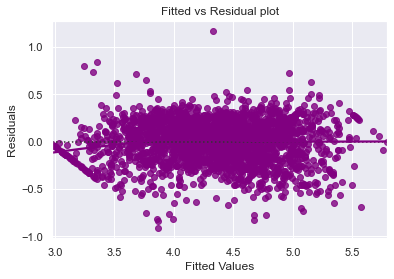

<IPython.core.display.Javascript object>

In [73]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

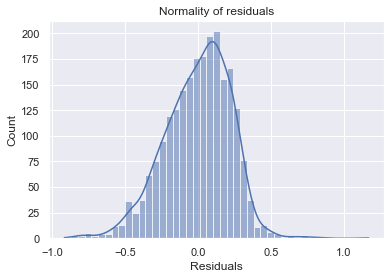

<IPython.core.display.Javascript object>

In [74]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

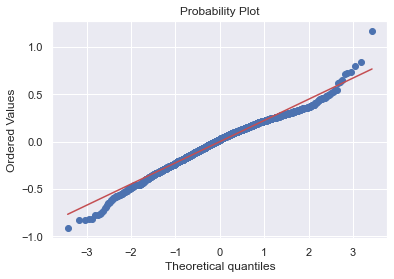

<IPython.core.display.Javascript object>

In [75]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [76]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9843611717224121, pvalue=4.012231593784801e-15)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [77]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
lzip(name, test)

[('F statistic', 1.0440262434486194), ('p-value', 0.23468729765804316)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data

In [78]:
# predictions on the test set
pred = olsmodel2.predict(x_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1296,4.888920,5.041843
846,4.099498,4.116246
868,3.268808,3.464693
1108,4.819555,4.740831
4,4.389995,4.503086
574,5.185541,4.991659
2309,4.030339,4.082121
1261,5.003409,4.978824
1559,4.778030,4.494427
2384,4.065945,4.032308


<IPython.core.display.Javascript object>

- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [79]:
x_train_final = x_train4.copy()
x_test_final = x_test4.copy()

<IPython.core.display.Javascript object>

In [80]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.836
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                     1153.
Date:                   Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                           18:47:19   Log-Likelihood:                 163.76
No. Observations:                   2279   AIC:                            -305.5
Df Residuals:                       2268   BIC:                            -242.5
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [81]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.225193,0.179451,0.835612,0.834815,4.220008


<IPython.core.display.Javascript object>

In [82]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.221985,0.174632,0.836383,0.834518,4.122467


<IPython.core.display.Javascript object>

### Let's print the linear regression equation.

In [83]:
# Let us write the equation of linear regression
Equation = "normalized_used_price="
print(Equation, end=" ")
for i in range(len(x_train4.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end=" ")
    elif i != len(x_train4.columns) - 1:
        print(
            olsmodel_final.params[i], "* (", x_train4.columns[i], ")", "+", end="  ",
        )
    else:
        print(olsmodel_final.params[i], "* (", x_train4.columns[i], ")")

normalized_used_price= 1.0862669093527524 + 0.041499694779382396 * ( screen_size ) +  0.02180527834484864 * ( main_camera_mp ) +  0.016762571600513598 * ( selfie_camera_mp ) +  0.0007181772222587993 * ( int_memory ) +  0.0017057060663940098 * ( weight ) +  0.3947668250005958 * ( normalized_new_price ) +  -0.11273347515437082 * ( brand_name_Celkon ) +  -0.06553011196769348 * ( brand_name_Sony ) +  0.07502879966196578 * ( brand_name_Xiaomi ) +  0.048713144857267195 * ( 4g_yes )


<IPython.core.display.Javascript object>

## Actionable Insights and Recommendations 

1. The model is able to explain ~83% of the variation in the data and within 4.12% of the used price on the test data, which is good
    - This indicates that the model is good for prediction as well as inference purposes

2. If the screen_size increases by one unit, then its normalized_used_price increases by 0.0415 units, all other variables held constant

3. If the selfie_camera_mp increases by one unit, then its normalized_used_price increases by 0.0168 units, all other variables held constant

4. If the int_memory increases by one unit, then its normalized_used_price increases by 0.0007 units, all other variables held constant

5. If the weight increases by one unit, then its normalized_used_price increases by 0.0017 units, all other variables held constant

6. If the normalized_new_price increases by one unit, then its normalized_used_price increases by 0.3948 units, all other variables held constant

7. As the used price increase with an increase in its screen_size , the company can look to offer phones with big screens

8. EDA reveals Android as the predominant Operating system

___